In [33]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Dropout, Flatten

In [7]:
# fetch images count from folders
count = 0
dirs = os.listdir("data/flowers/")
for dir in dirs:
    files = list(os.listdir("data/flowers/"+dir))
    print(dir + "Folder has " + str(len(files)) + " Images")
    count = count + len(files)
print("Flowers folder has total " + str(count) + " Images")

daisyFolder has 764 Images
roseFolder has 784 Images
tulipFolder has 984 Images
dandelionFolder has 1052 Images
sunflowerFolder has 733 Images
Flowers folder has total 4317 Images


In [8]:
BASE_DIR = "data/flowers/"
IMAGE_SIZE = 180
BATCH = 32

In [9]:
# Load Images into Arrays as Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(BASE_DIR,
                                                        seed=42, 
                                                        validation_split=0.2, 
                                                        subset='training',
                                                        batch_size=BATCH,
                                                        image_size=IMAGE_SIZE
                                                        )

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [10]:
# Load Images into Arrays as Dataset
valid_ds = tf.keras.utils.image_dataset_from_directory(BASE_DIR,
                                                        seed=42, 
                                                        validation_split=0.2, 
                                                        subset='validation',
                                                        batch_size=BATCH,
                                                        image_size=IMAGE_SIZE
                                                        )

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [11]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [12]:
import matplotlib.pyplot as plt

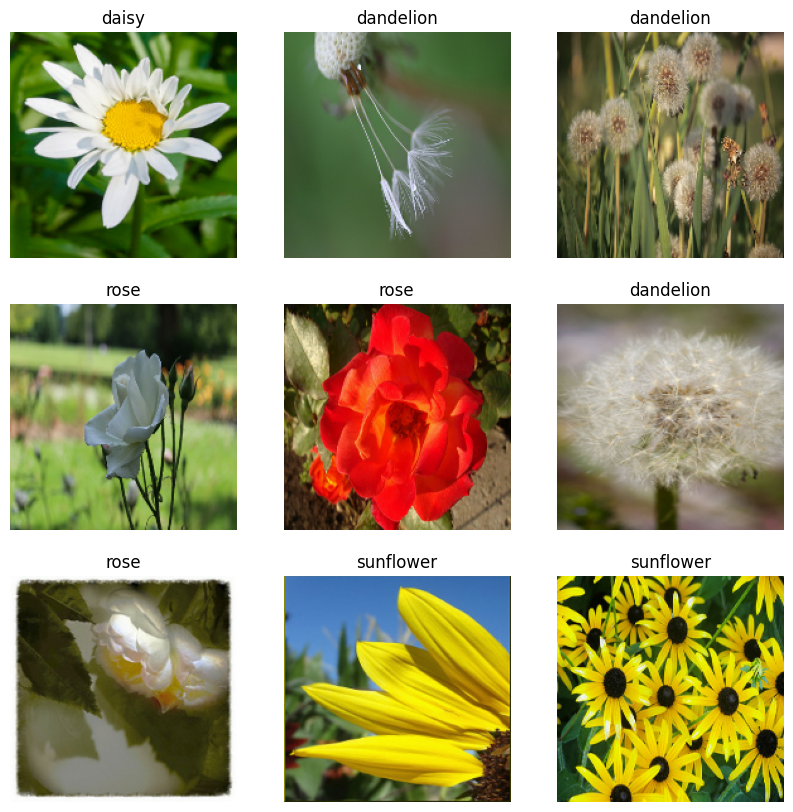

In [18]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis("off");


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) 

In [21]:
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE) 

In [30]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

2024-11-27 12:46:37.222620: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


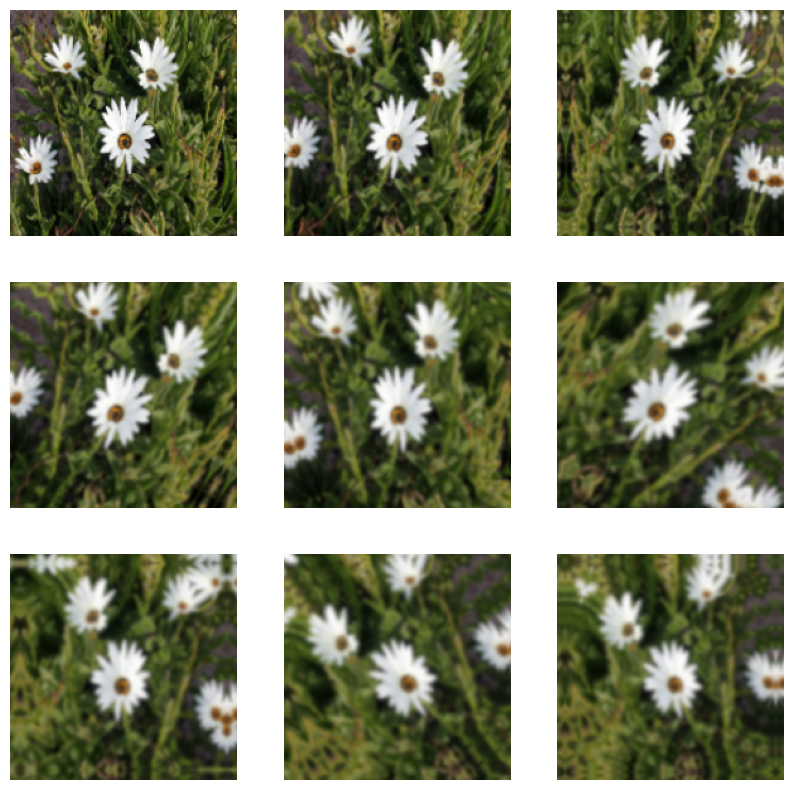

In [31]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off');


In [ ]:
## Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1.0/255),
    Conv2D(16, 3 , padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3 , padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3 , padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'), # input layer
    Dense(5) # output layer
])

In [35]:
## Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
              )

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 997,093 (3.80 MB)

 Trainable params: 997,093 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(train_ds, epochs=15,validation_data=valid_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.3632 - loss: 1.4366 - val_accuracy: 0.5388 - val_loss: 1.1069
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.5526 - loss: 1.1062 - val_accuracy: 0.5829 - val_loss: 1.0045
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.5894 - loss: 1.0484 - val_accuracy: 0.6373 - val_loss: 0.9175
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.6299 - loss: 0.9490 - val_accuracy: 0.6222 - val_loss: 0.9598
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.6489 - loss: 0.8914 - val_accuracy: 0.6616 - val_loss: 0.8513
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.6599 - loss: 0.8567 - val_accuracy: 0.6547 - val_loss: 0.8448
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.6777 - loss: 0.8384 - val_accuracy: 0.6466 - val_loss: 0.8899
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.6992 - loss: 0.7673 - val_accu

In [42]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_expand_dim = tf.expand_dims(input_image_array, 0)
    predictions = model.predict(input_image_expand_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = f"The Image belongs to {flower_names[np.argmax(result)]} with a score of {str(np.max(result)*100)}"
    return outcome


In [45]:
classify_images("data/samples/tulip.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'The Image belongs to tulip with a score of 94.34711'

In [46]:
model.save('Flower_Prediction_Model.h5')